In [51]:
from universal_format import UniversalFormat
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.pyplot as plt

# Define file path and file name

### Look into exporting this to PDF :)


In [61]:
p = Path("/home/mcormier/git/divan/tests/308B/")

f = 'CPA_CYC_180427_Nw_c0_365V_55C_C3C3_201201_SAF_R5A_15M_2VC_11_1_13_250_stitched.txt'
#f = 'CPA_CYC_180427_Nw_c0_365V_55C_C3C3_201201_SAF_R5A_15M_2VC_11_1_13_250.txt'
#f = 'jim_cyc_64065_nW_C0_43V_55c_170202_2vcdtd_300_945_BESTFORGRAPH_20_1.txt'
path = p / f
fpath = str(path)
#dstpath = '/blah/blahblah/'

In [68]:
data = UniversalFormat(fpath)

Removing indices due to time non-monotonicity: [  3421  18069  28621  28998  31354  31356  31358  31360  32003  32995
  33112  34767  37446  41303  53610  56220  58152  59673  59843  59957
  60127  67871  68722  81645  81676  82311  93633 104456 105004 105197
 107138 107365 107702]
Found charge C-rates: ['C/20', 'C/2']
Found discharge C-rates: ['C/20', 'C/2']


In [66]:
#t, dis_cap = data.get_discap(rate='C/20', x_var='time', vrange=[3.8, 4.0])
t, dis_cap = data.get_discap(rate='C/20', x_var='time', normcyc=3)

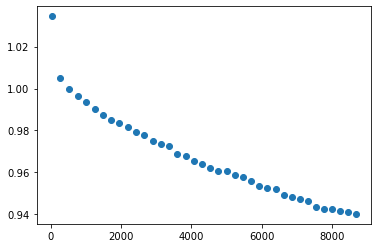

In [67]:
plt.plot(t, dis_cap, "o")

In [6]:
def model(t, A, B):
    return 1 - A*t**(1/2) - B*t

In [12]:
t, dis_cap = t[2:20], dis_cap[2:20]

In [13]:
popt, pcov = curve_fit(model, t, dis_cap, method='trf', max_nfev=5000,
                       ftol=1e-14, xtol=None, gtol=None)
print("A = {0:.8f}, B = {1:.10f}".format(popt[0], popt[1]))

A = 0.00063980, B = 0.0000063345


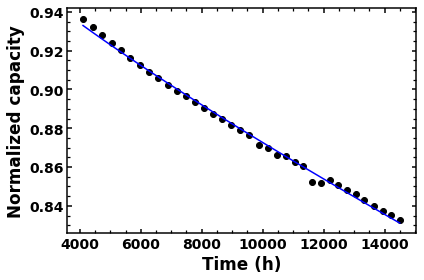

In [14]:
with plt.style.context('grapher'):
    plt.plot(t, dis_cap, "o")
    plt.plot(t, model(t, popt[0], popt[1]))
    plt.xlabel('Time (h)')
    plt.ylabel('Normalized capacity')
    #plt.ylim(0, 1)

In [ ]:
file_list = ['file1.txt', 'file2.txt']
A = np.zeros(4)
T = np.array([20, 40, 55 ,70]) + 273
for i in range(5):
    path = p / file_list[i]
    fpath = str(path)
    data = UniversalFormat(fpath)
    t, dis_cap = data.get_discap(rate='C/20', x_var='time', normcyc=3)
    popt, pcov = curve_fit(model, t, dis_cap, method='trf', max_nfev=5000,
                       ftol=1e-14, xtol=None, gtol=None)
    print("A = {0:.8f}, B = {1:.10f}".format(popt[0], popt[1]))
    A[i] = popt[0]
    
plt.semilogy(1/T, A)
slope = (np.log(A)[-1] - np.log(A)[0]) / (1/T[-1] - 1/T[0])